## Student Performance Indicator  

#### Life cycle of Machine learning Project 
   
- Understanding the Problem Statement  
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model  

#### Understanding the Problem Statement
 
1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.  
  
2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

#### 2.1  Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('.\dataset\students.csv')


In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

#### 2.2 Information about Dataset:
  
  
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
math score
- reading score
- writing score

#### 3. Data Pre-Processing
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing values


In [5]:
df.isna().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### 3.2 Check Duplicates


In [6]:
df.duplicated().sum()


0

#### 3.3 Check data types


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of data set


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### -> Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [10]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 3.6 Categorizing the data

In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']  # excluding object type columns
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O'] # only object type columns

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.7 Adding columns for "Total Score" and "Average"


In [13]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

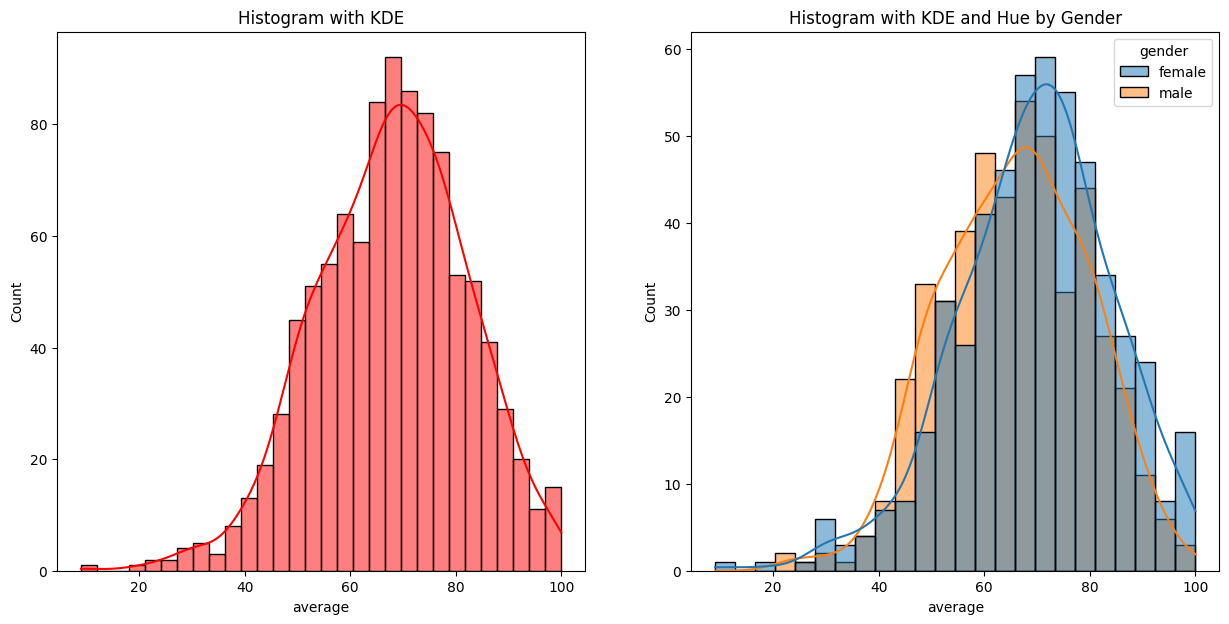

In [16]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot
#bins=30: Number of bins (bars) in the histogram.
sns.histplot(data=df, x='average', bins=30, kde=True, color='r', ax=axs[0])
axs[0].set_title('Histogram with KDE')

# Second subplot
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Histogram with KDE and Hue by Gender')

# Show plot
plt.show()

Visualizing the distribution of test preparation course of students.

test_preparation_course
none         642
completed    358
Name: count, dtype: int64


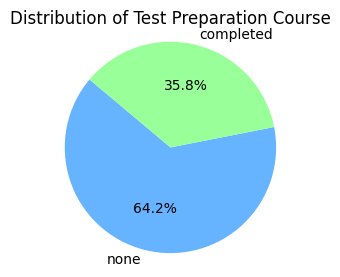

Many of the students have not completed the test preparation course. 
The ratio of students who have completed the course to those who have not is 35.8% to 64.2%.


In [17]:
# Count the number of students in each category of test_preparation_course
course_counts = df['test_preparation_course'].value_counts()
print(course_counts)

# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(course_counts, labels=course_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Test Preparation Course')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

print("Many of the students have not completed the test preparation course. \nThe ratio of students who have completed the course to those who have not is 35.8% to 64.2%.")

Visualizing test preparation course, and gender with Average score

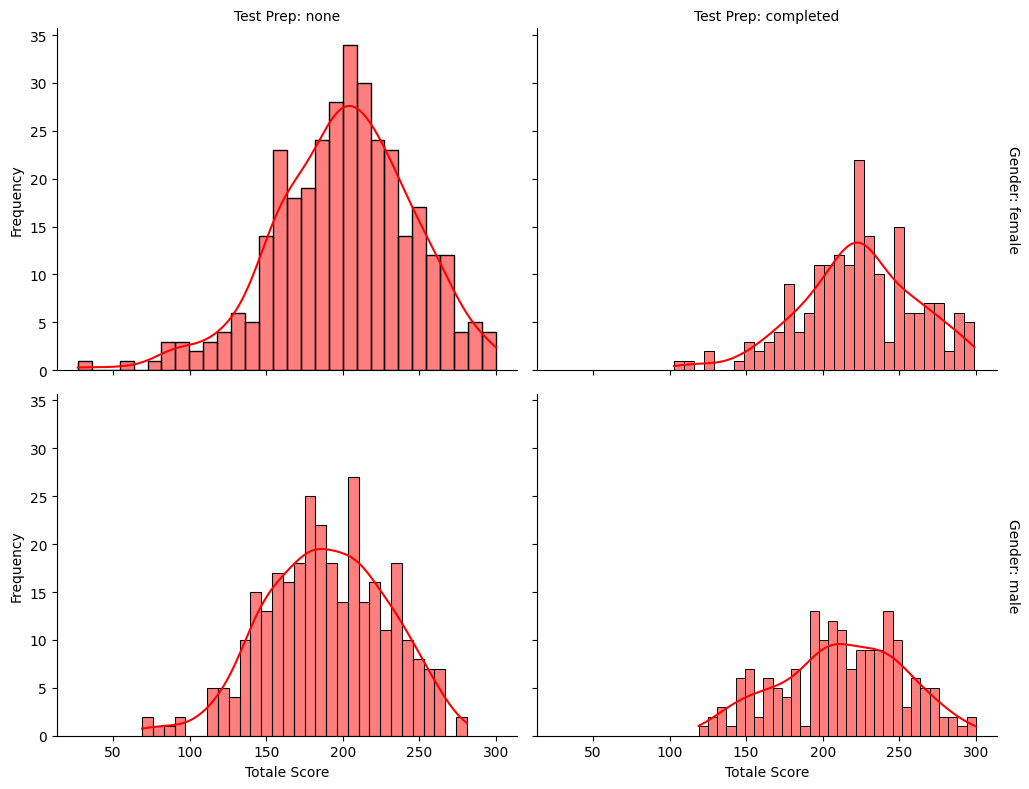

In [18]:
# Create a FacetGrid
g = sns.FacetGrid(df, col='test_preparation_course', row='gender', margin_titles=True, height=4, aspect=1.3)

# Map the histplot to the grid
g.map(sns.histplot, 'total score', bins=30, kde=True, color='r')

# Add titles and labels
g.set_axis_labels('Totale Score', 'Frequency')
g.set_titles(col_template='Test Prep: {col_name}', row_template='Gender: {row_name}')

# Adjust layout
plt.tight_layout()
plt.show()


Visualizing test preparation course, Math Score and gender

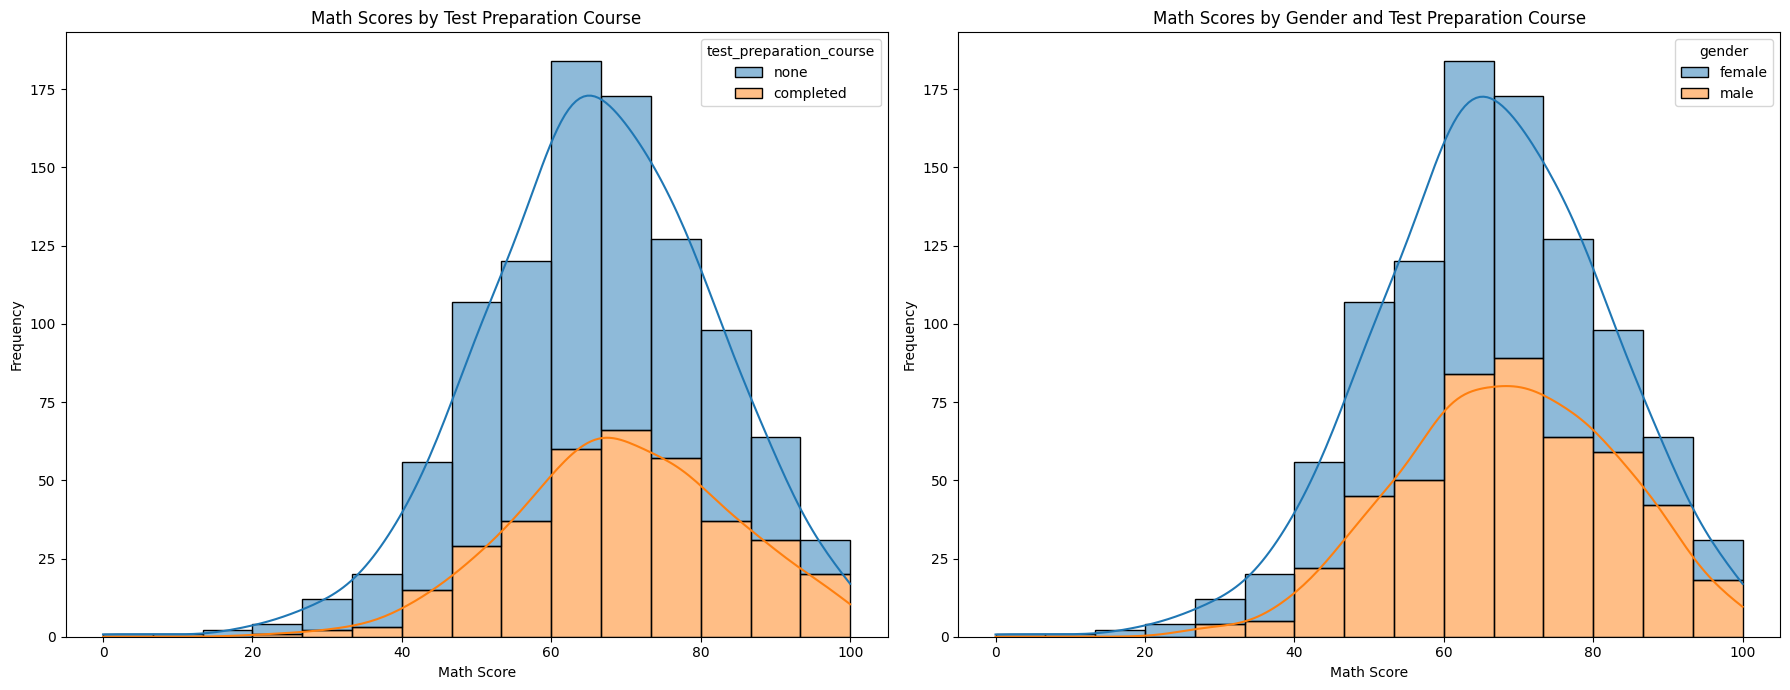

In [19]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# First subplot: Math scores based on test preparation course
sns.histplot(data=df, x='math_score', hue='test_preparation_course', multiple='stack', bins=15, kde=True, ax=axs[0])
axs[0].set_title('Math Scores by Test Preparation Course')
axs[0].set_xlabel('Math Score')
axs[0].set_ylabel('Frequency')

# Second subplot: Math scores by gender and test preparation course
sns.histplot(data=df, x='math_score', hue='gender', multiple='stack', bins=15, kde=True, ax=axs[1])
axs[1].set_title('Math Scores by Gender and Test Preparation Course')
axs[1].set_xlabel('Math Score')
axs[1].set_ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()

Visualizing test preparation course, and gender with Math Score

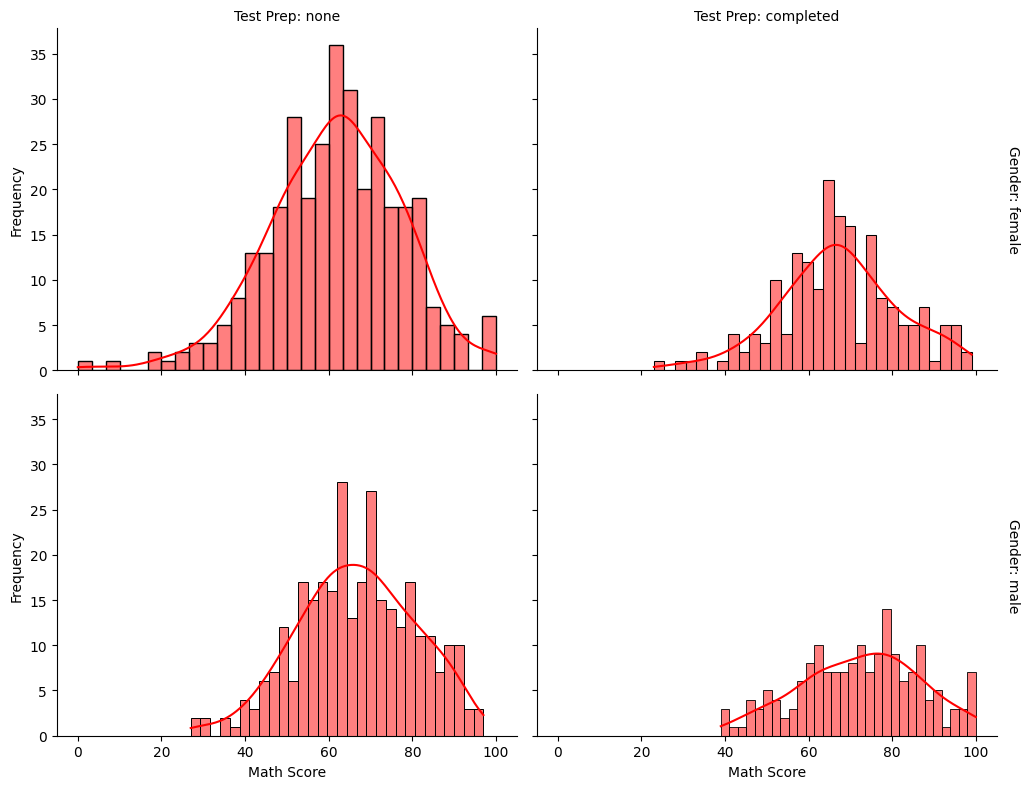

In [20]:
# Create a FacetGrid
g = sns.FacetGrid(df, col='test_preparation_course', row='gender', margin_titles=True, height=4, aspect=1.3)

# Map the histplot to the grid
g.map(sns.histplot, 'math_score', bins=30, kde=True, color='r')

# Add titles and labels
g.set_axis_labels('Math Score', 'Frequency')
g.set_titles(col_template='Test Prep: {col_name}', row_template='Gender: {row_name}')

# Adjust layout
plt.tight_layout()
plt.show()


#### -> Insight:
From the above graphs we can see conclude that:
- the girls are performing better than boys in all the subjects
- the students who not completed the test preparation course are performing better than those who completed the course.
- The ratio of students who completed the test preparation course is less than those who did not complete the course.
    



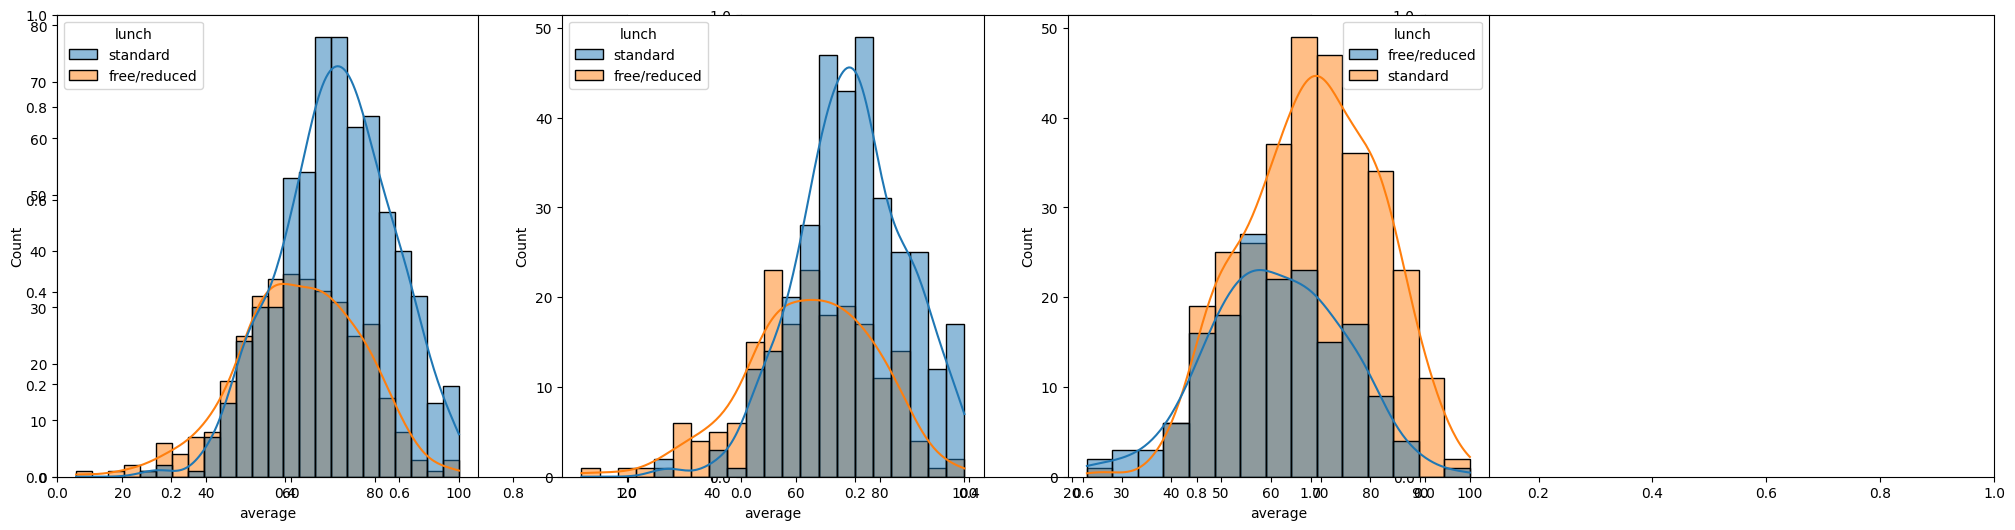

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

We can see that the standard lunch students are performing better than the free/reduced lunch students.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


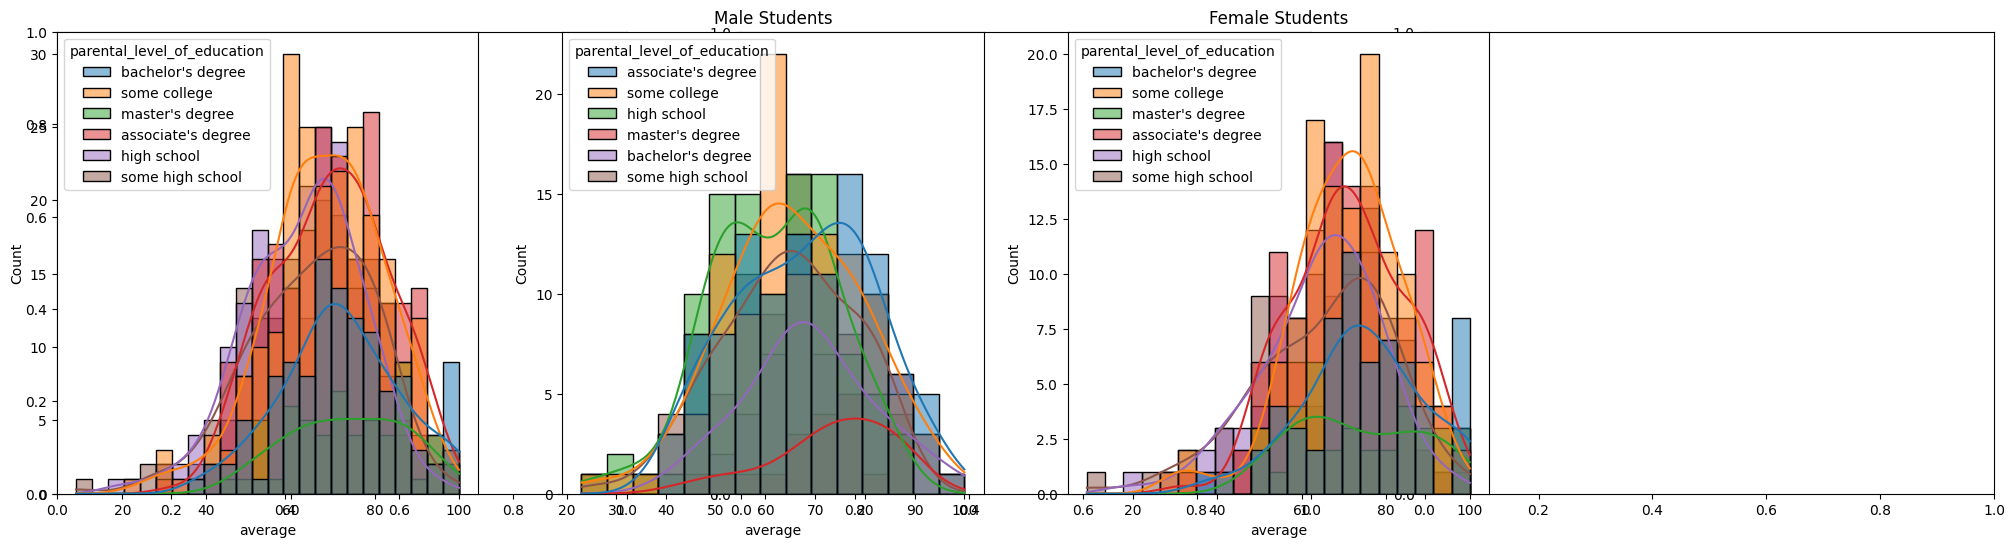

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.title("Male Students")
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.title("Female Students")
plt.show()

#### Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


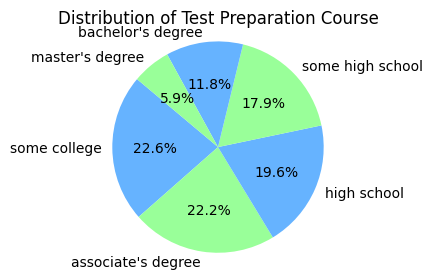

In [24]:
# Count the number of students in each category of test_preparation_course
course_counts = df['parental_level_of_education'].value_counts()
print(course_counts)

# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(course_counts, labels=course_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Test Preparation Course')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


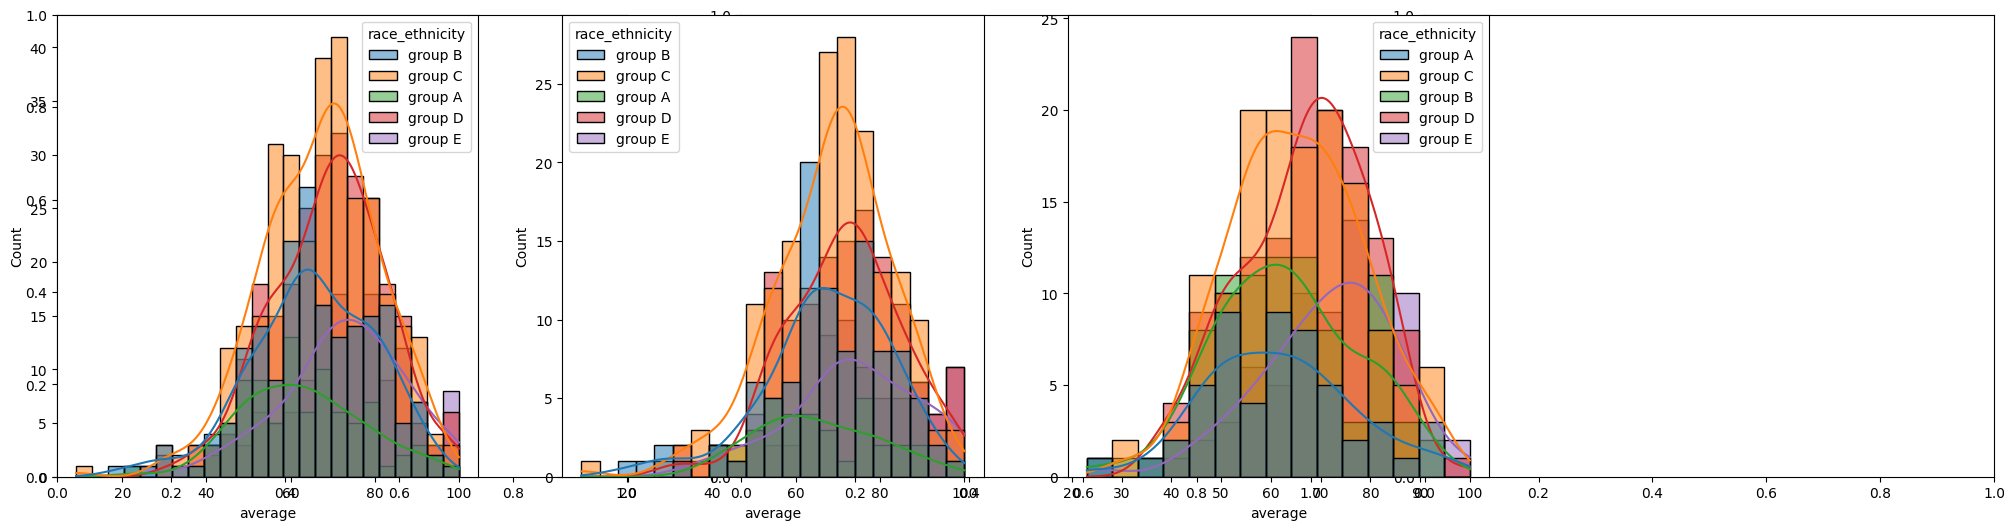

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.
- Students of group C, D and E tends to perform well in exam irrespective of whether they are male or female.

#### 4.2 Maximumum score of students in all three subjects

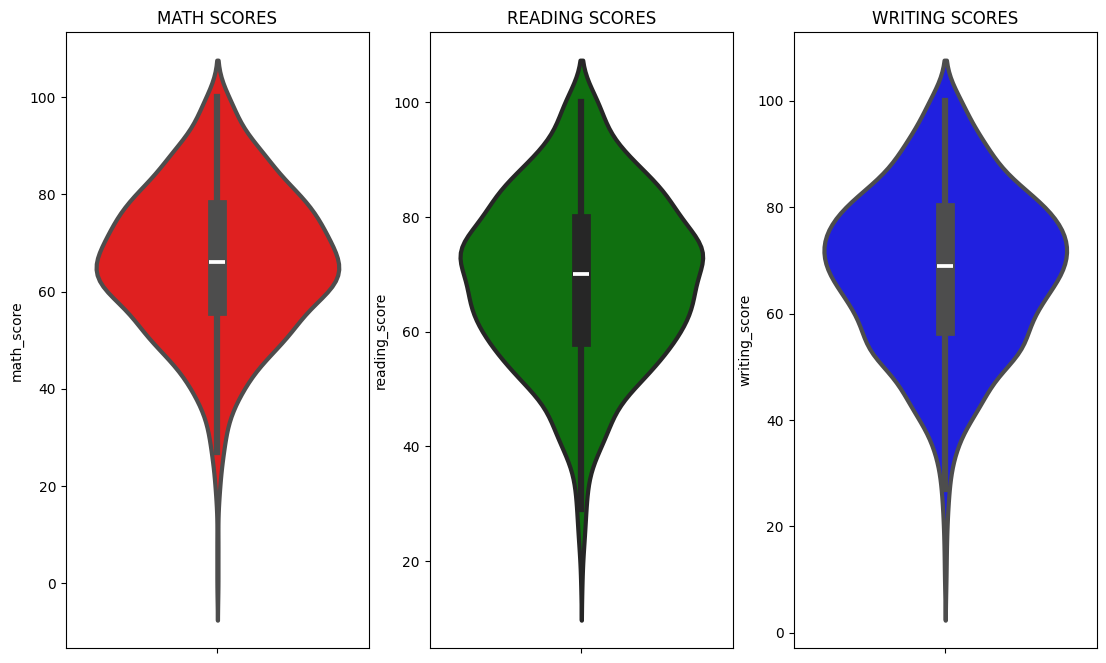

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

### 4.3 Multivariate analysis using pieplot


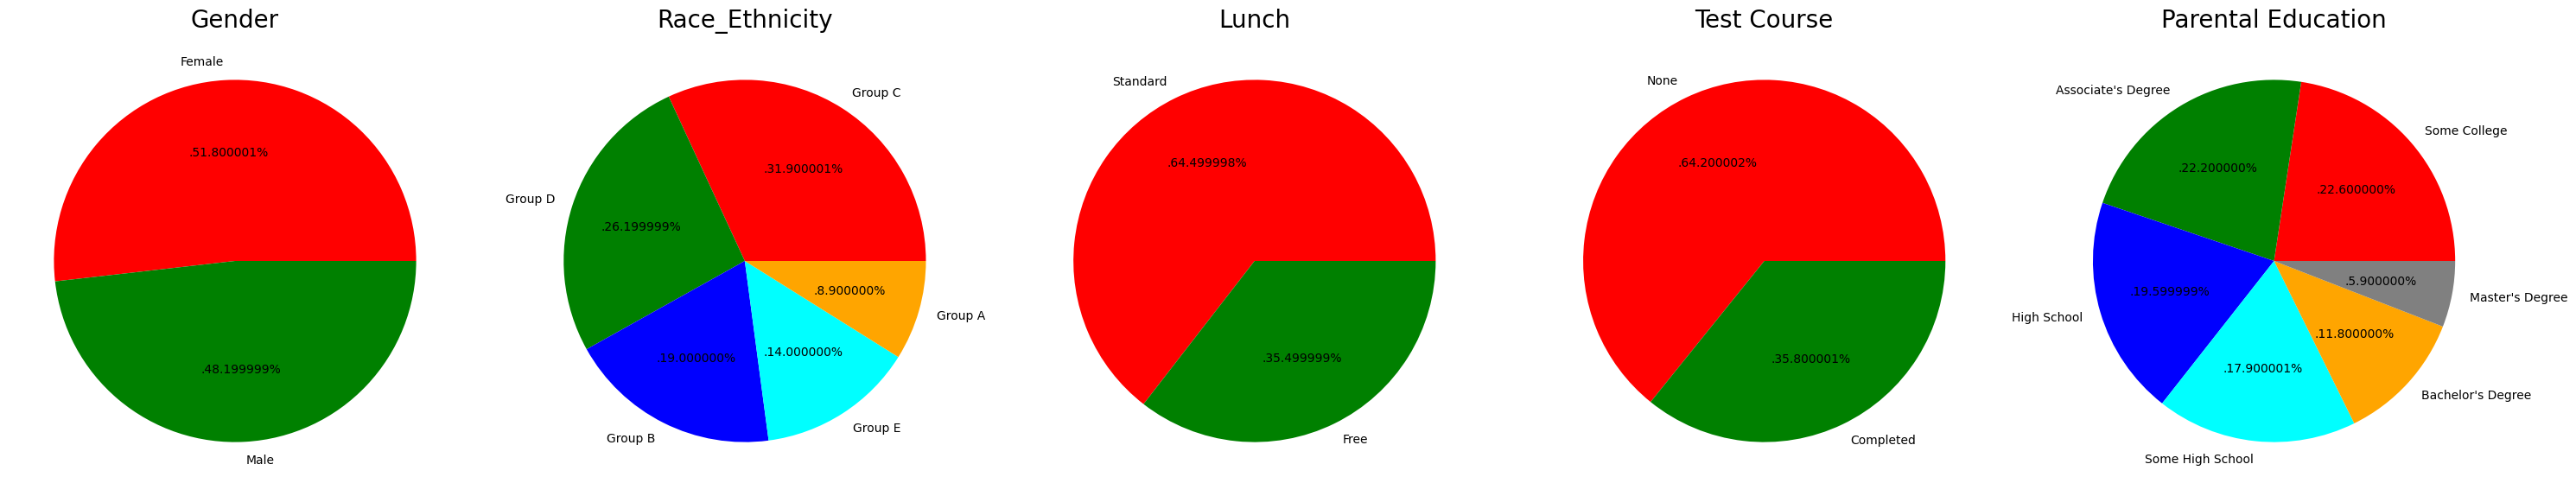

In [27]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization

#### 4.4.1 GENDER COLUMN
How is distribution of Gender ?  
Is gender has any impact on student's performance ?  
  


UNIVARIATE ANALYSIS ( How is distribution of Gender ? )  



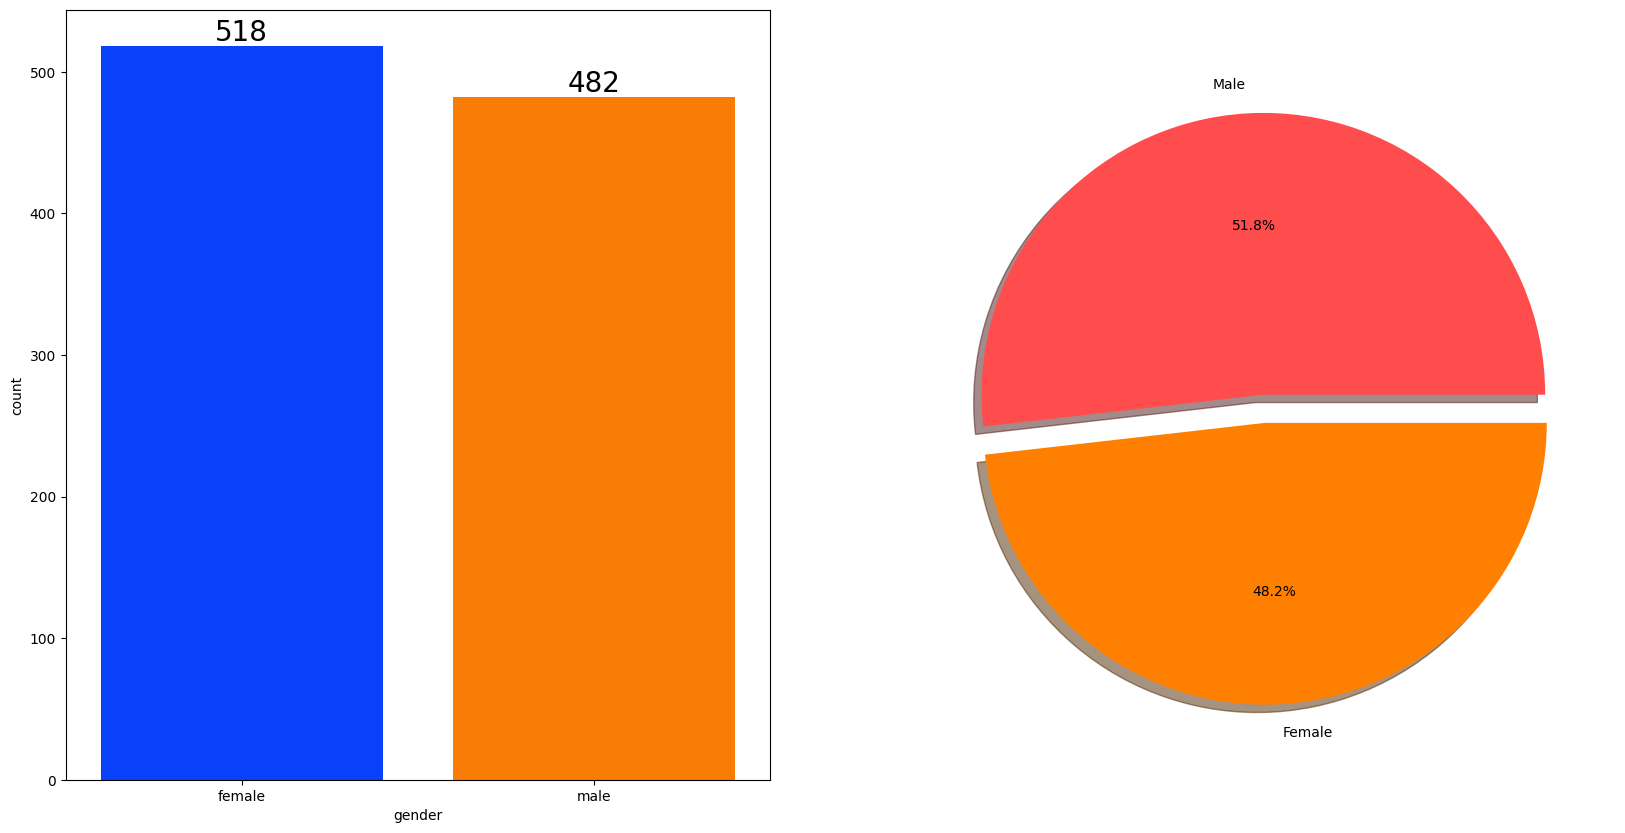

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [29]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Group by gender and calculate the mean for numeric columns
gender_group = df.groupby('gender')[numeric_columns].mean()

# Display the result
print(gender_group)

        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


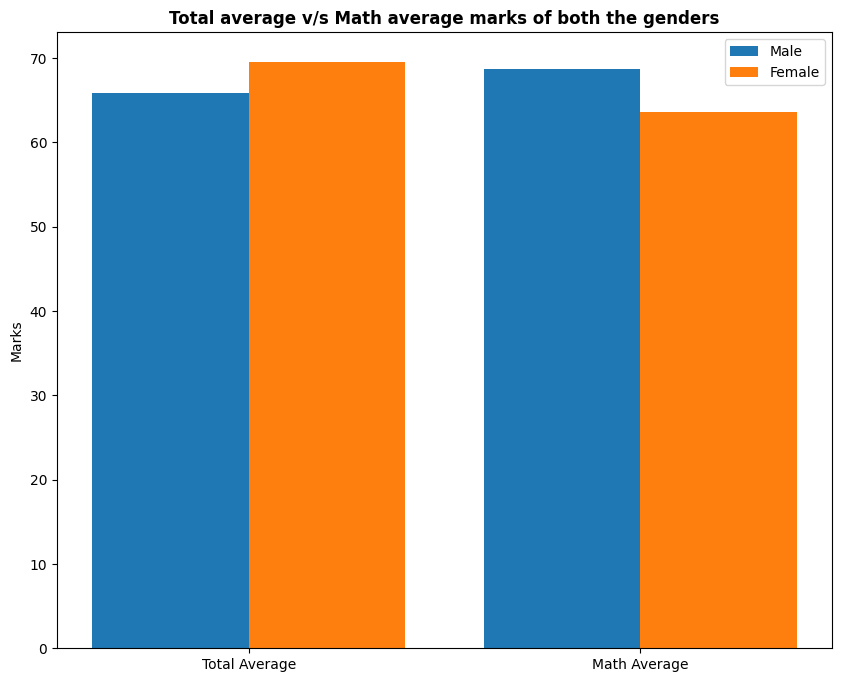

In [30]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?  
  
  
UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

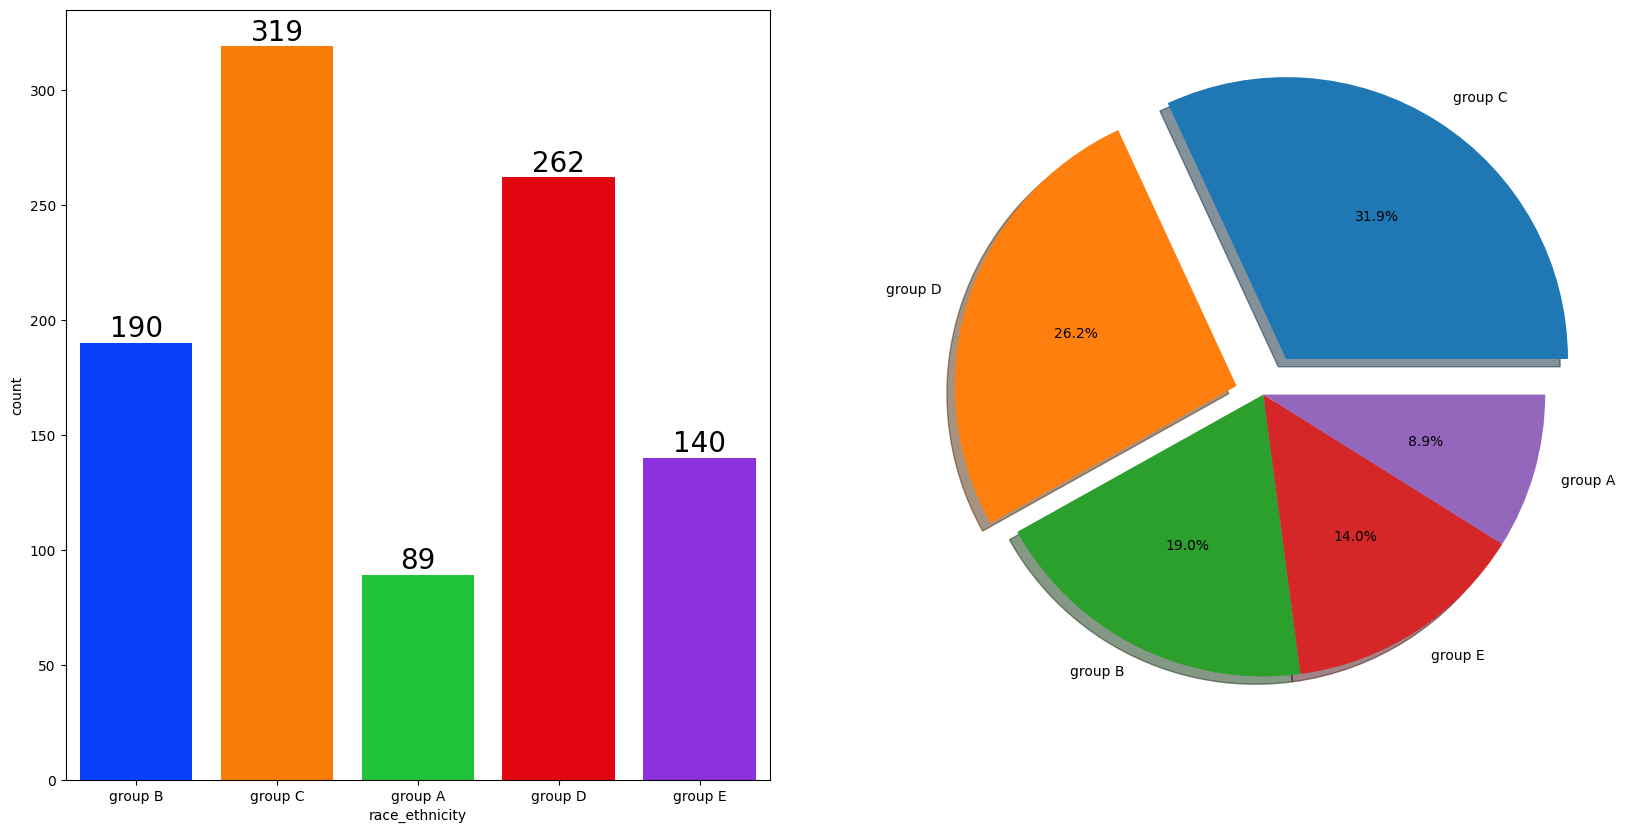

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.15,0.1,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insights
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.


BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )


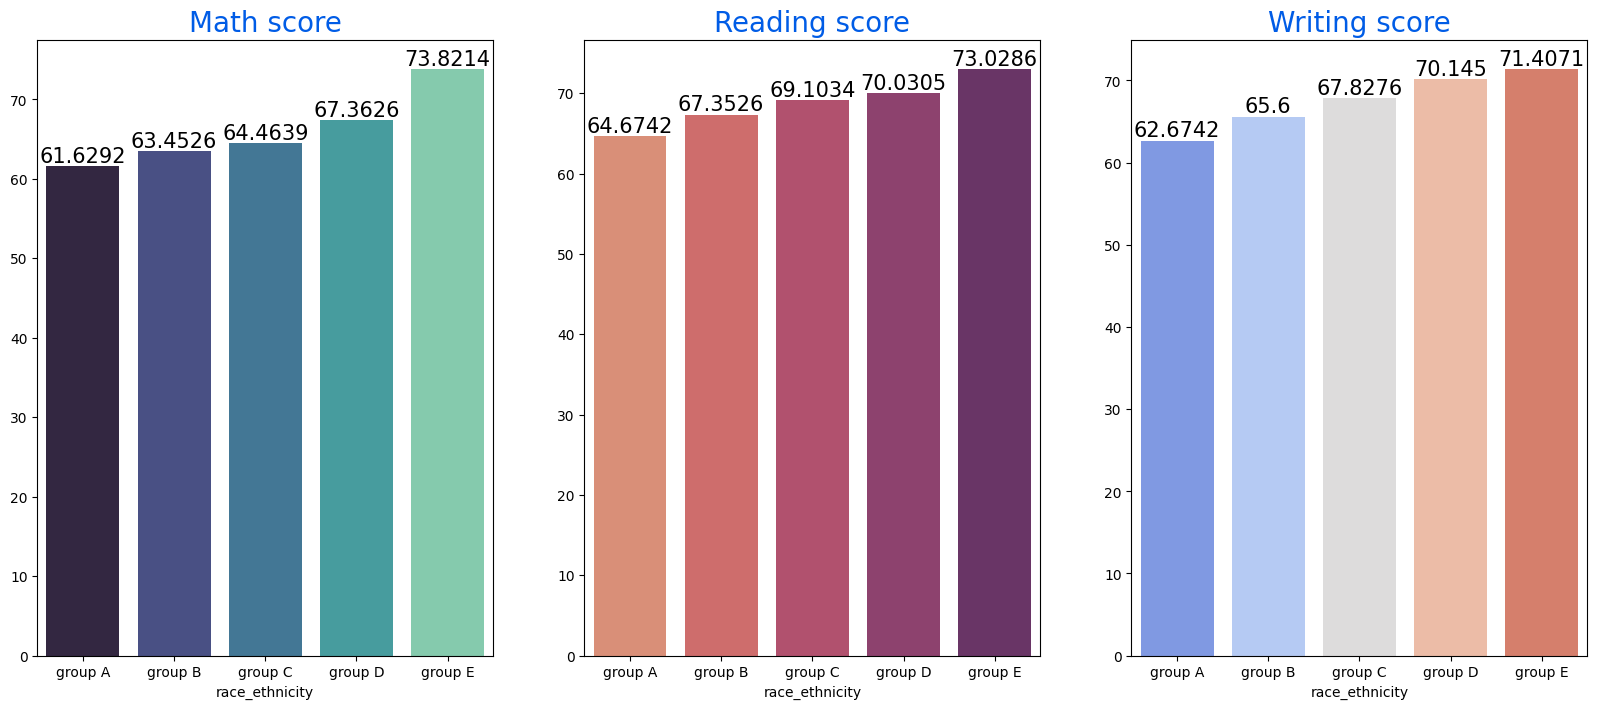

In [32]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights
- Group E students have scored the highest marks in all the subjects despite they are less in number.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?  
  
  
UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )


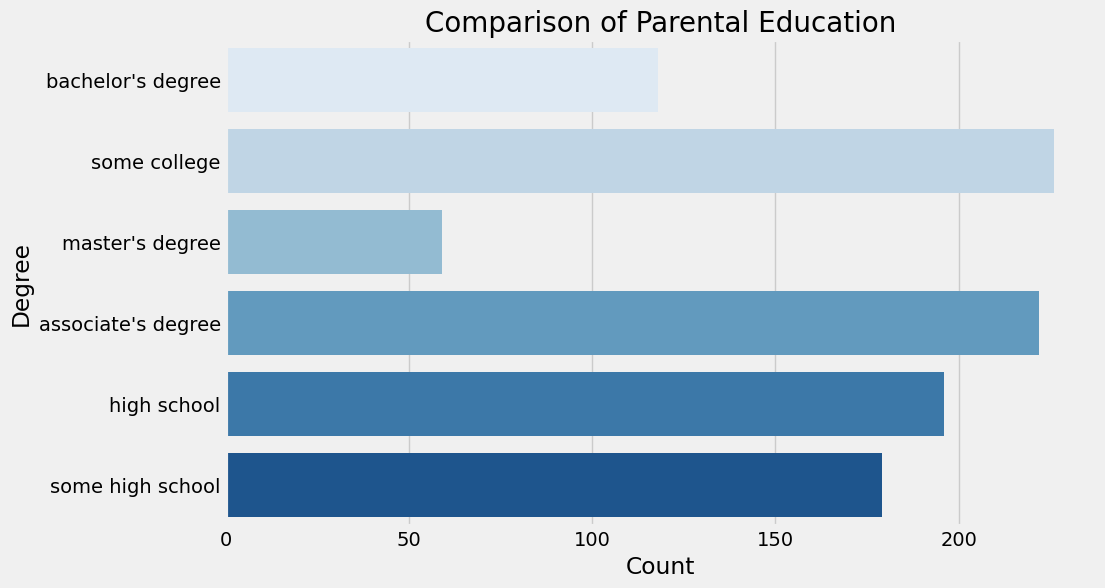

In [33]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('fivethirtyeight')

# Create a count plot with horizontal orientation
sns.countplot(y='parental_level_of_education', data=df, palette='Blues', orient='h')

# Add titles and labels
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Count')
plt.ylabel('Degree')

# Show the plot
plt.show()

Insights  
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### 4.4.5 TEST PREPARATION COURSE COLUMN

- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?
  

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )


<Axes: xlabel='lunch', ylabel='writing_score'>

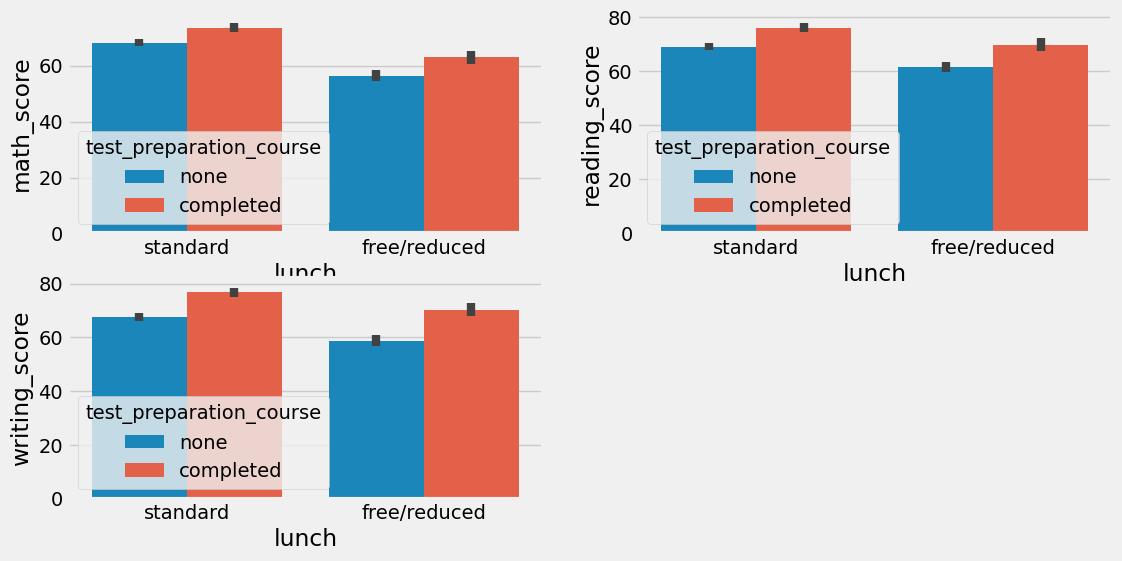

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### 4.4.6 CHECKING OUTLIERS


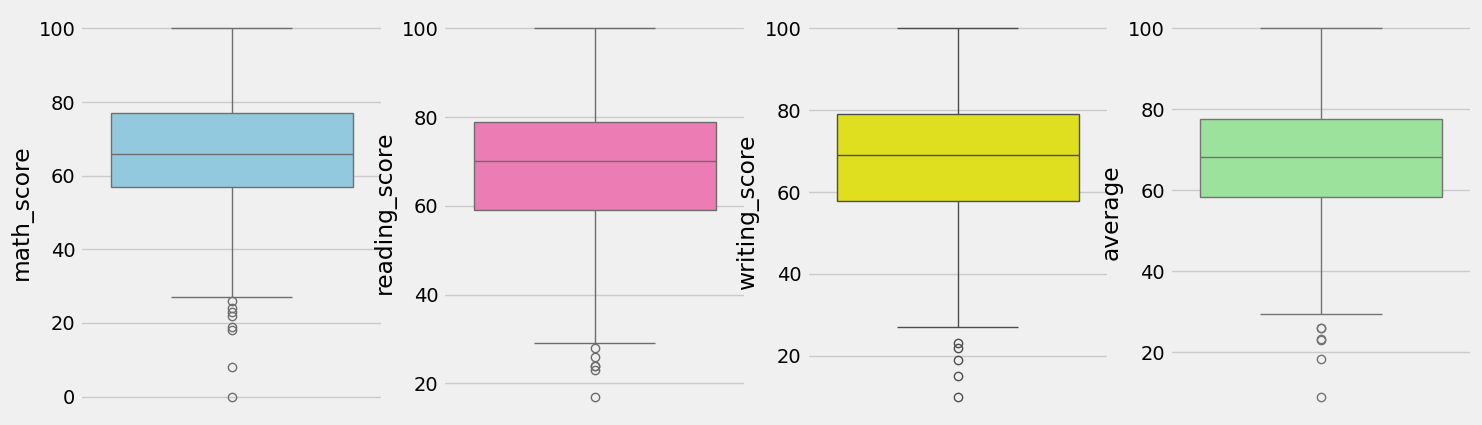

In [35]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

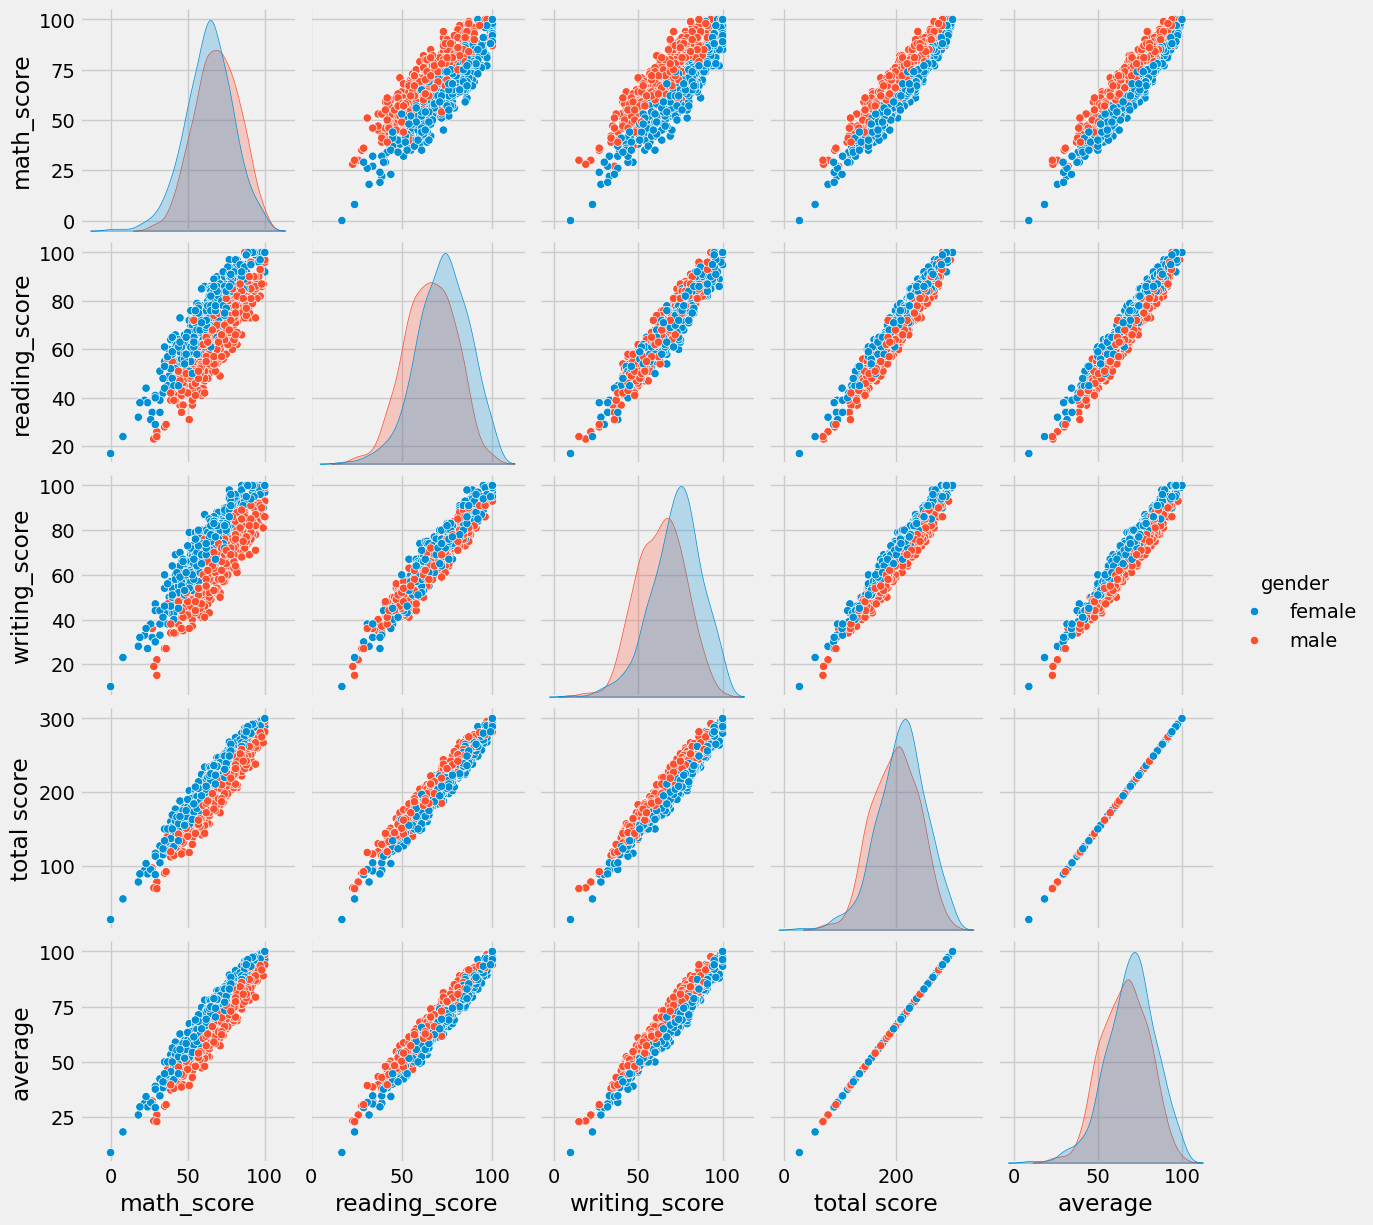

In [36]:
sns.pairplot(df,hue = 'gender')
plt.show()

**Data Summary Function**  
  
This Python function, data_summary, is a powerful tool for comprehensive data analysis and visualization. It takes a pandas DataFrame as input and performs a wide range of exploratory data analysis tasks. From basic statistics to advanced visualizations, this function provides a thorough overview of your dataset's structure, distributions, and potential issues. It covers aspects such as missing values, outliers, correlations, and variable distributions, making it an invaluable asset for initial data exploration and quality assessment. By using this function, data scientists and analysts can quickly gain insights into their data, identify areas for further investigation, and make informed decisions about data preprocessing and modeling strategies.

In [38]:
def data_summary(df):

    print("DATASET", "\n")
    print("Number of Rows: ", df.shape[0] ,",","Number of Columns:" , df.shape[1] , "\n")
    print("Column Names:", df.columns.values, "\n")
    print("_" * 100,"\n") 

    #Head
    print("HEAD", "\n")
    display(df.head())
    print("\n") 

    #Summary
    print("SUMMARY", "\n")
    kategorik_degiskenler = df.select_dtypes(include=['object'])
    if kategorik_degiskenler.shape[1]!=0:
        print("Count of Categorical Variables:  ",kategorik_degiskenler.shape[1])
        print("Column Names:", kategorik_degiskenler.columns.values, "\n")
        print("_" * 100,"\n")

    numerik_degiskenler = df.select_dtypes(include=['int', 'float'])
    if numerik_degiskenler.shape[1]!=0:
        print("Numerical Variables Count: ", numerik_degiskenler.shape[1])
        print("Column Names:", numerik_degiskenler.columns.values, "\n")
        print("_" * 100,"\n")

    diger_turler = df.select_dtypes(exclude=['object','int', 'float'])
    if diger_turler.shape[1]!=0:
        print("Count of Other Types of Data: ", diger_turler.shape[1])
        print("Column Names:", diger_turler.columns.values, "\n")
        print("_" * 100,"\n")

    #INFO
    print("INFO", "\n")
    df.info()
    print("\n")
    print("_" * 100,"\n")

    #DESCRİBE
    print("DESCRIBE", "\n")
    display(df.describe().T)
    print("_" * 100,"\n")

    #CORRELATİON & HEAT MAP
    print("CORRELATION & HEAT MAP", "\n")
    print("CORRELATION", "\n")
    display(numerik_degiskenler.corr() )
    print("\n")
    print("HEAT MAP", "\n")
    plt.figure(figsize=(10,10)) 
    sns.heatmap(numerik_degiskenler.corr(),annot=True)
    plt.show()
    print("_" * 100,"\n")

    #MİSSİNG VALUE
    print("MISSING VALUE", "\n")
    if df.isna().sum().sum()==0:
        print("There are no missing values in this dataset.")

    if df.isna().sum().sum()!=0:
        print("Total missing data count: ",df.isna().sum().sum())
        print("Percentage of missing data to the total dataset: ",round(100*(df.isna().sum().sum()/df.shape[0]), 2))

        print("\n")
        null_count = df.isnull().sum().sort_values(ascending=False)
        null_count=null_count[null_count>0]
        df_nc = pd.DataFrame(null_count, columns=['Missing Value Count'])
        missing_percentage= 100*(df.isna().sum().sort_values(ascending = False)/len(df))
        missing_percentage= missing_percentage[missing_percentage!=0]
        df_nc = pd.DataFrame(null_count, columns=['Missing Value Count'])
        df_nc["Percentage of Missing Value "] = round(missing_percentage,2)
        print(df_nc)
        print("\n")
        null_count.plot(kind='bar')
        plt.title('Graphical Distribution of Missing Values')
        plt.show()

    print("_" * 100,"\n")


    #DUPLİCATE VALUE
    print("DUPLICATE VALUE", "\n")
    if df.duplicated().sum()>0:
        print("Duplicate Data Count:",df.duplicated().sum())
        print("Percentage of repeated data to the whole dataset: ",round(100*(df.duplicated().sum()/df.shape[0]), 2))        
        print("\n")
        display(df[df.duplicated()])
    else:
        print("There is no duplicate data in this dataset.")
    print("_" * 100,"\n")


    #OUTLIER VALUES
    print("OUTLIER VALUES")
    for column in numerik_degiskenler:
        Q1 = numerik_degiskenler[column].quantile(0.25)
        Q3 = numerik_degiskenler[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit=Q1 - 1.5*IQR
        upper_limit=Q3 + 1.5*IQR

        if lower_limit!=0 and upper_limit!=0:
            if lower_limit>0 or upper_limit>0:
                out=(numerik_degiskenler[(numerik_degiskenler[column]<lower_limit)| ((numerik_degiskenler[column]>upper_limit))])
                if len(out)!=0:
                    plt.figure(figsize=[8,4])
                    plt.subplot(1, 2, 1)
                    text1=str(column) + " column has outliers according to the IQR method."
                    text2="Number of outliers in "+ str(column) + " column: "+ str(len(out))
                    text=text1+"\n"+text2
                    plt.text(0.5, 0.5, text, ha='center', va='center', size=10,color="black")
                    plt.axis('off')  
                    plt.subplots_adjust(wspace=1, hspace=0.6)
                    plt.subplot(1, 2, 2)
                    sns.boxplot(data=df[column])
                    plt.title('box plot chart for outliers in the ' + str(column)) 
                    plt.show()
                    print("_" * 100,"\n")


        else:
            if len(out)==0:
                print('There are no outliers in this dataset according to the IQR method Outliers are calculated using integer and float type variables. ')
                print("_" * 100,"\n")


    for column in df:
        if df[column].nunique() >10: 
            if df[column].dtype==int or df[column].dtype==float:
                plt.figure(figsize=[8,4])
                plt.subplot(1, 2, 1)
                info="Brief information about "
                sütun=column+" column"
                count="Total number of values:"+str(df[column].value_counts().sum())
                maximum="Maximum value in column:"+str(df[column].max())
                minimum="Minimum value in column:"+str(df[column].min())
                uniqe_count=" Unique Values: "+str(df[column].nunique())
                data_type="Data Type: "+str(df[column].dtype)
                text=info+sütun+"\n"+count+"\n"+maximum+"\n"+minimum+"\n"+uniqe_count+"\n"+data_type
                plt.text(0.5, 0.5,text, ha='center', va='center', size=10, style='italic',color="black")
                plt.axis('off')
                plt.subplot(1, 2, 2)
                plt.title('distribution of values in the ' + str(column))
                sns.histplot(data=df, x=column, kde=True)
                plt.ylabel('frequency')
                plt.subplots_adjust(wspace=1, hspace=0.6)
                plt.show()
                print("_" * 100,"\n")

            else:
                plt.figure(figsize=[8,4])
                plt.subplot(1, 2, 1)
                info="Brief information about "
                sütun=column+" column"
                uniqe_count=" Unique Values : "+str(df[column].nunique())
                uniqe_value=" Unique Values (First 10 Values) : "+"\n"+str(df[column].unique()[0:10])
                data_type="Data Type : "+str(df[column].dtype)
                text=info+sütun+"\n"+uniqe_count+"\n"+uniqe_value+"\n"+data_type
                plt.text(0.5, 0.5,text, ha='center', va='center', size=10, style='italic',color="black")
                plt.subplots_adjust(wspace=2, hspace=0.6)
                plt.axis('off')  

                plt.subplot(1, 2, 2)
                plt.title('Distribution of values in the ' + str(column))
                sns.countplot(df[0:10], x=column)
                plt.xticks(rotation=90)
                plt.show()
                print("_" * 100,"\n")


        else:      
            plt.figure(figsize=[8,4])
            plt.subplot(1, 2, 1)
            info="Brief information about "
            sütun=column+" column"
            uniqe_count=" Unique Values: "+str(df[column].nunique())
            uniqe_value=" Unique Values: "+str(df[column].unique())
            data_type="Data Type: "+str(df[column].dtype)
            text=info+sütun+"\n"+uniqe_count+"\n"+uniqe_value+"\n"+data_type
            plt.text(0.5, 0.5,text, ha='center', va='center', size=10, style='italic',color="black")
            plt.subplots_adjust(wspace=2, hspace=0.6)
            plt.axis('off')  
            plt.subplot(1, 2, 2)
            plt.title('Distribution of values in the ' + str(column))
            sns.countplot(df, x=column)
            plt.xticks(rotation=90)
            plt.show()
            print("_" * 100,"\n")


    print("Data Summary Completed")
    print("_" * 100,"\n")

DATASET 

Number of Rows:  1000 , Number of Columns: 10 

Column Names: ['gender' 'race_ethnicity' 'parental_level_of_education' 'lunch'
 'test_preparation_course' 'math_score' 'reading_score' 'writing_score'
 'total score' 'average'] 

____________________________________________________________________________________________________ 

HEAD 



,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333




SUMMARY 

Count of Categorical Variables:   5
Column Names: ['gender' 'race_ethnicity' 'parental_level_of_education' 'lunch'
 'test_preparation_course'] 

____________________________________________________________________________________________________ 

Numerical Variables Count:  5
Column Names: ['math_score' 'reading_score' 'writing_score' 'total score' 'average'] 

____________________________________________________________________________________________________ 

INFO 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089000,15.163080,0.0,57.000000,66.000000,77.000000,100.0
reading_score,1000.0,69.169000,14.600192,17.0,59.000000,70.000000,79.000000,100.0
writing_score,1000.0,68.054000,15.195657,10.0,57.750000,69.000000,79.000000,100.0
total score,1000.0,203.312000,42.771978,27.0,175.000000,205.000000,233.000000,300.0
average,1000.0,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0


____________________________________________________________________________________________________ 

CORRELATION & HEAT MAP 

CORRELATION 



,math_score,reading_score,writing_score,total score,average
math_score,1.000000,0.817580,0.802642,0.918746,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667,0.965667
total score,0.918746,0.970331,0.965667,1.000000,1.000000
average,0.918746,0.970331,0.965667,1.000000,1.000000




HEAT MAP 



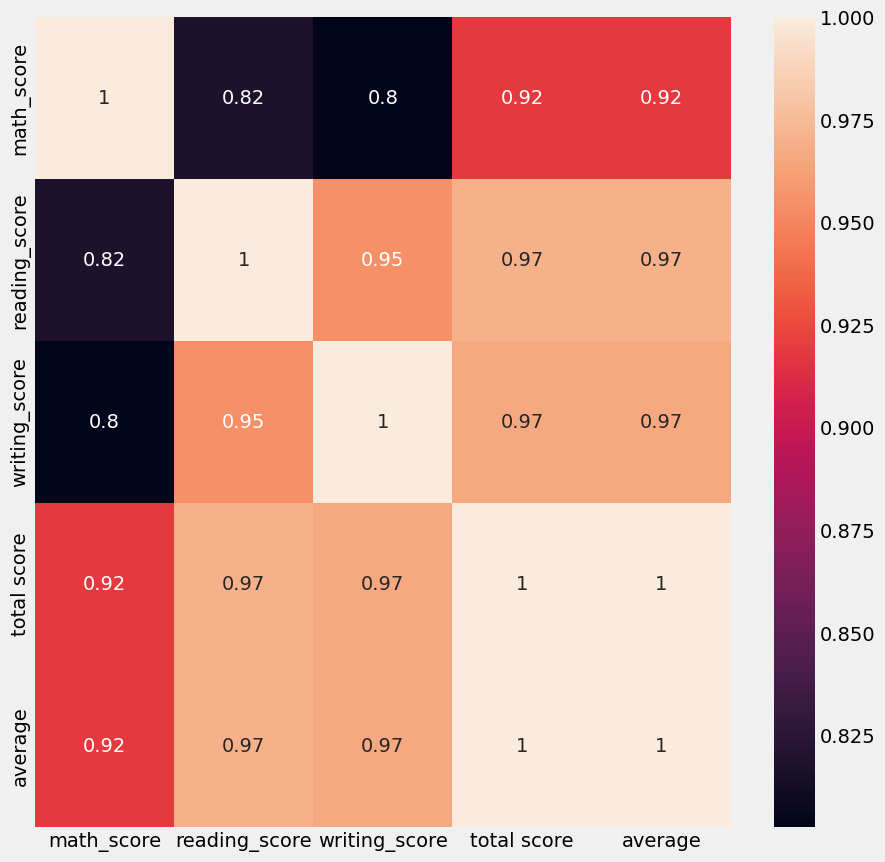

____________________________________________________________________________________________________ 

MISSING VALUE 

There are no missing values in this dataset.
____________________________________________________________________________________________________ 

DUPLICATE VALUE 

There is no duplicate data in this dataset.
____________________________________________________________________________________________________ 

OUTLIER VALUES


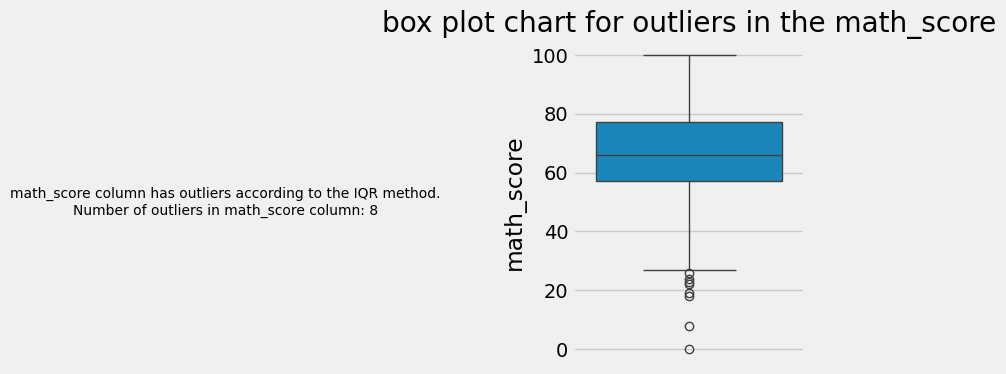

____________________________________________________________________________________________________ 



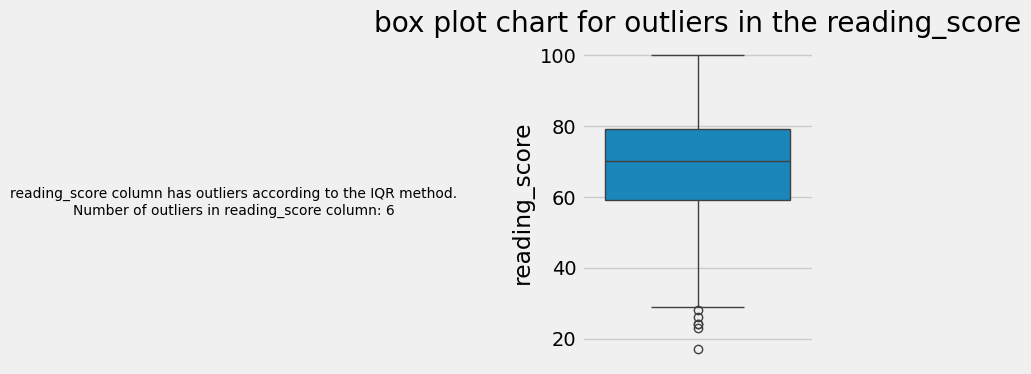

____________________________________________________________________________________________________ 



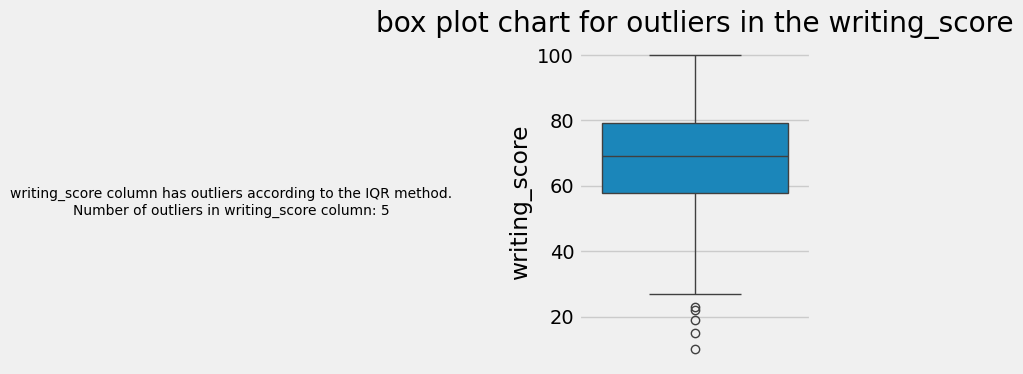

____________________________________________________________________________________________________ 



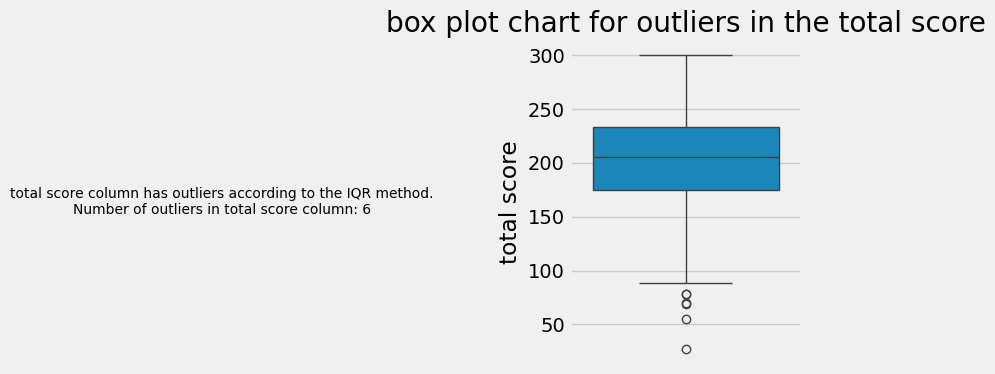

____________________________________________________________________________________________________ 



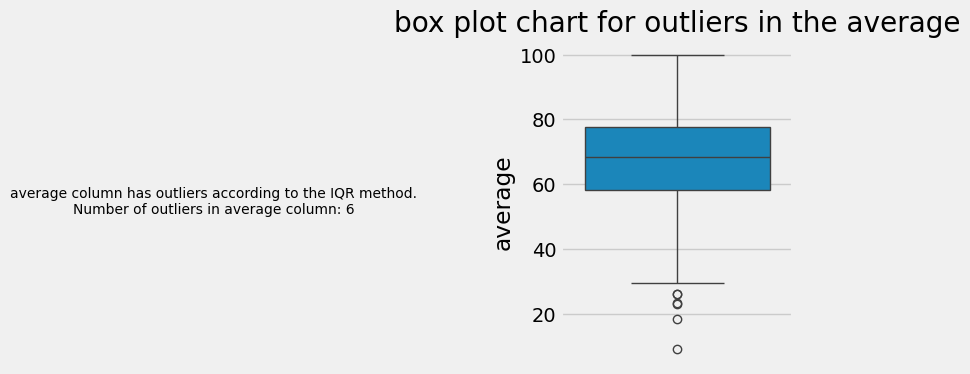

____________________________________________________________________________________________________ 



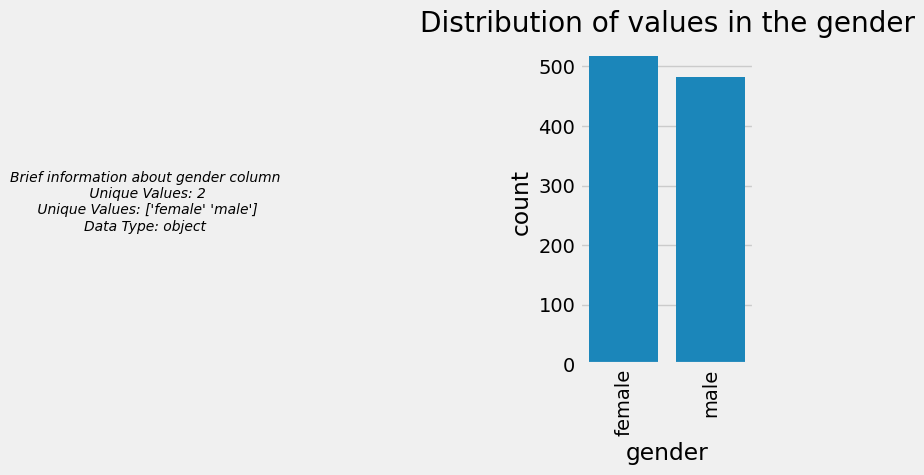

____________________________________________________________________________________________________ 



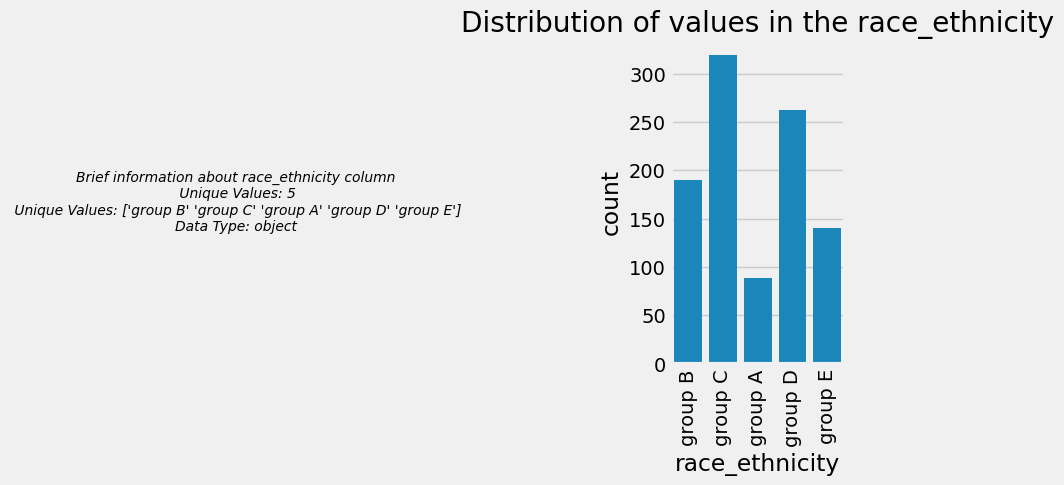

____________________________________________________________________________________________________ 



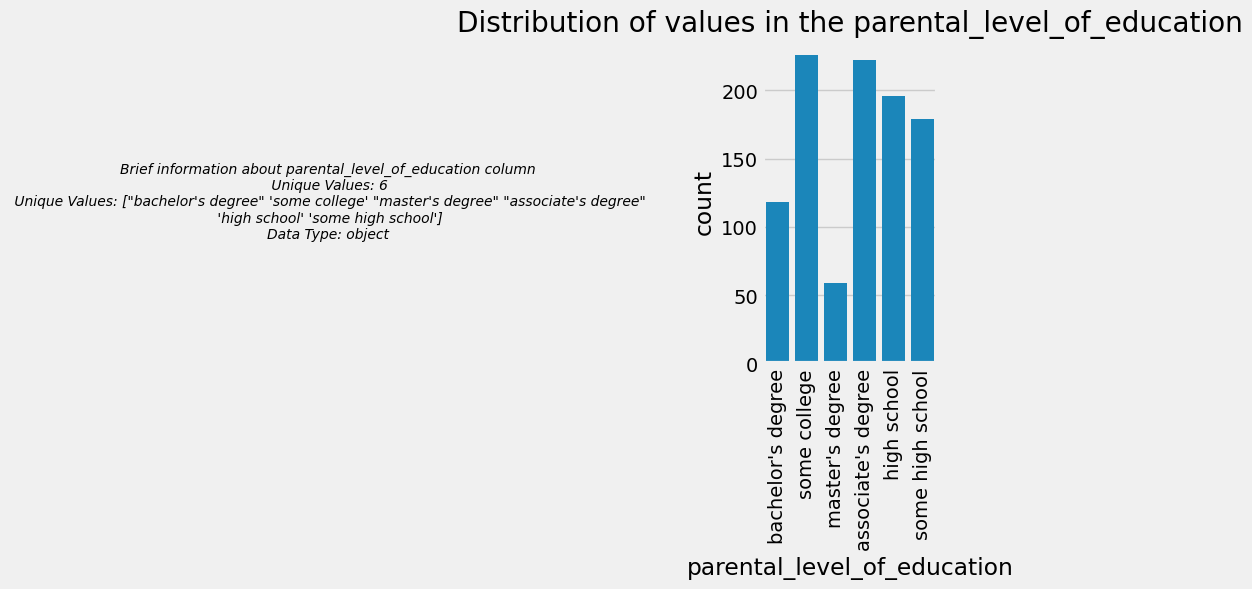

____________________________________________________________________________________________________ 



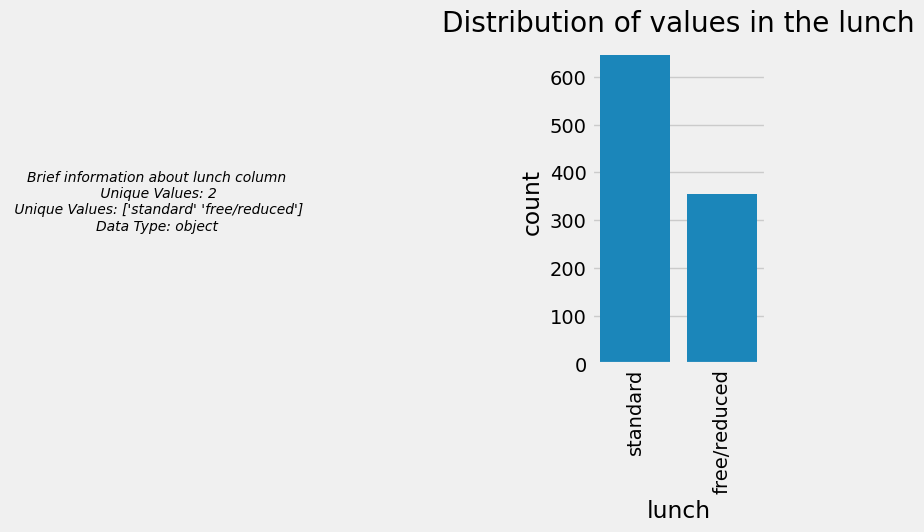

____________________________________________________________________________________________________ 



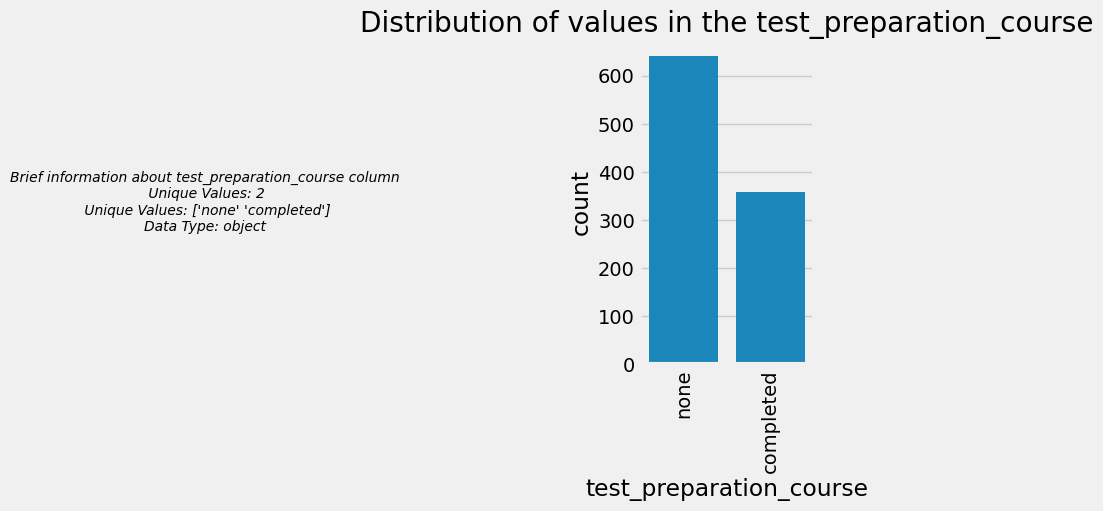

____________________________________________________________________________________________________ 



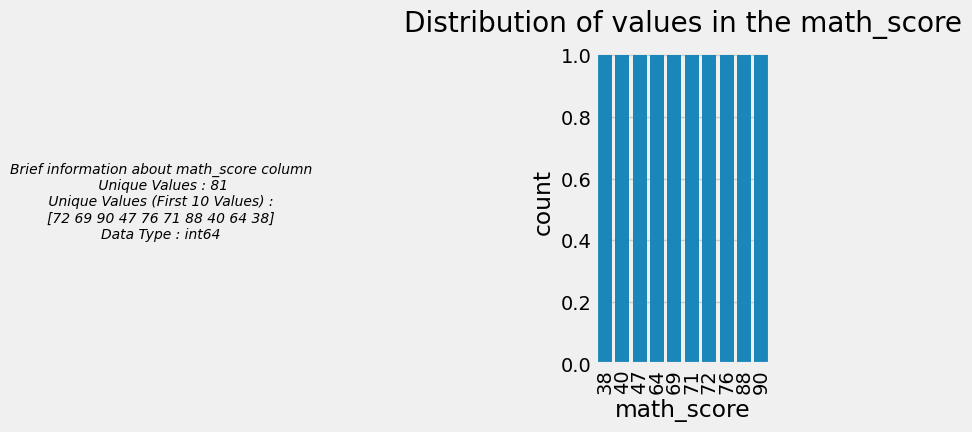

____________________________________________________________________________________________________ 



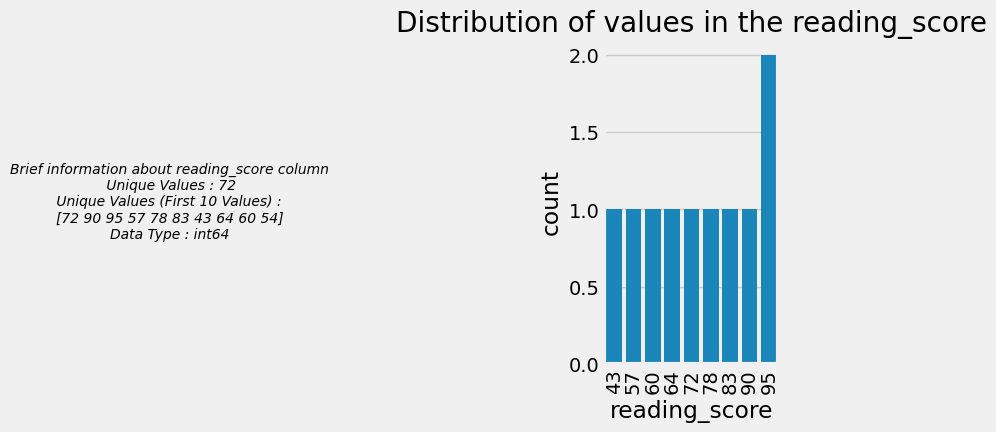

____________________________________________________________________________________________________ 



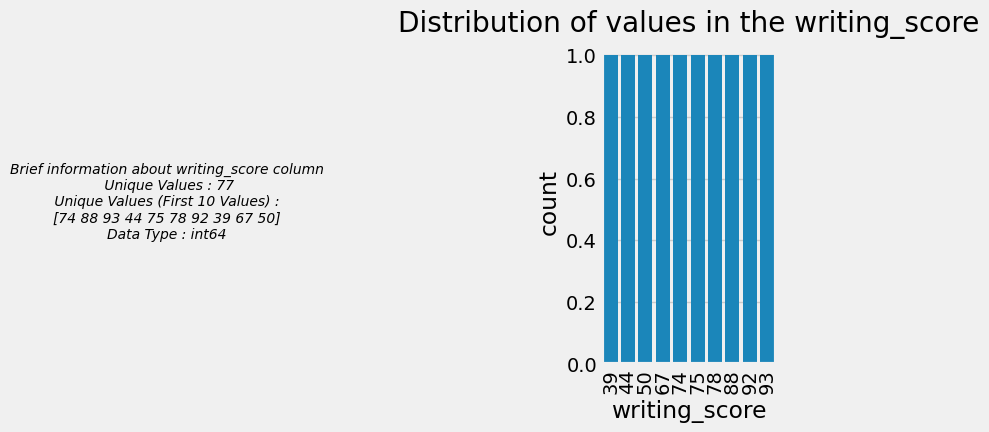

____________________________________________________________________________________________________ 



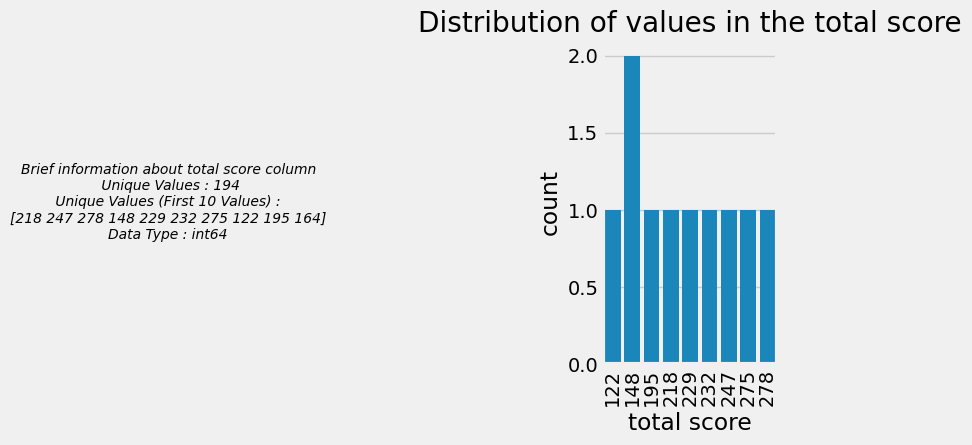

____________________________________________________________________________________________________ 



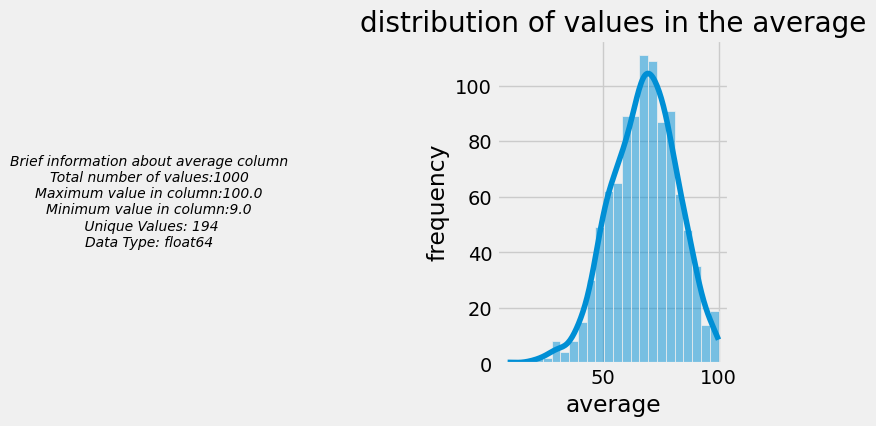

____________________________________________________________________________________________________ 

Data Summary Completed
____________________________________________________________________________________________________ 



In [39]:
data_summary(df)


Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.